### Ejercicio 14: Refineria

La siguiente figura muestra un diagrama muy simplificado del blending de crudos y de la distribuci
ón de la producción de una refinería. Como se puede observar hay cuatro tipos de crudos
disponibles y cuatro familias de productos. La refinería está separada en dos procesos, la cadena
de fuel (producción de diferentes gasolinas, keroseno, gasoil,...) y la cadena de lubes (aceites industriales).
En función del tipo de crudo se obtiene una distribución de productos diferentes, los rendimientos
a cada producto de cada crudo se muestran en la tabla 1. Asimismo, la demanda
máxima esperada de cada producto y los precios de venta de los mismos. Finalmente, la tabla
también presenta los costes de compra de los crudos, los costes de operación y el suministro de
cada crudo disponible.
Se pretende distribuir de forma optima los crudos entre los dos procesos de modo que los
beneficios se maximicen

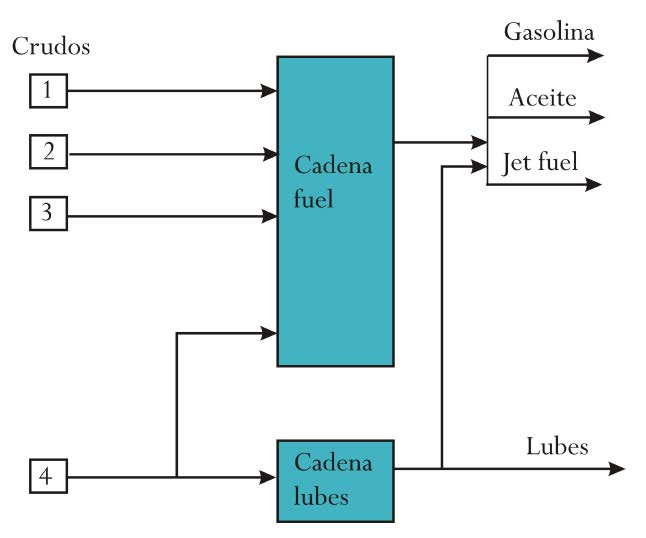

In [13]:
from IPython.display import Image 
Image(filename='img_enun/E14_1.jpg',width=400)

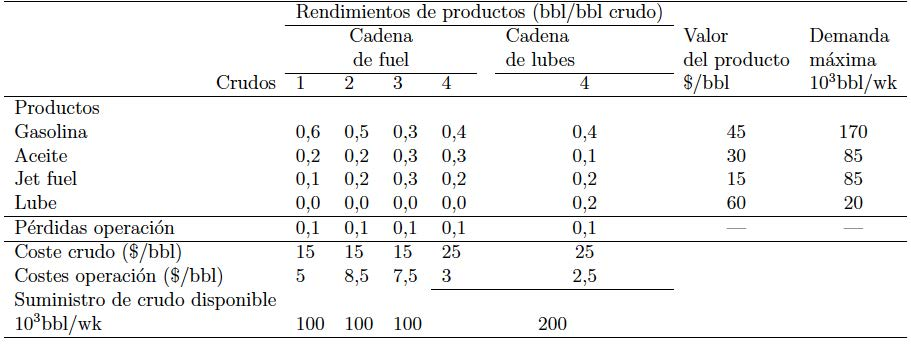

In [14]:
Image(filename='img_enun/E14_2.jpg',width=600)

In [15]:
from pyomo.environ import *
import numpy as np

In [16]:
model = ConcreteModel()

In [17]:
crudos = np.arange(5) #['Crudo1', 'Crudo2', 'Crudo3', 'Crudo4fuel', 'Crudo4lub']
crudos_disp = np.arange(3) # ['Crudo1', 'Crudo2', 'Crudo3']
prod = np.arange(5) #['Gasolina', 'Aceite', 'Jet fuel', 'Lube', 'Perdidas']
prod_precio = np.arange(4) #['Gasolina', 'Aceite', 'Jet fuel', 'Lube']

In [19]:
model.Fc = Var(crudos, domain=NonNegativeReals)

In [20]:
Rend = np.array([[0.6,0.5,0.3,0.4,0.4],
[0.2,0.2,0.3,0.3,0.1],
[0.1,0.2,0.3,0.2,0.2],
[0,0,0,0,0.2],
[0.1,0.1,0.1,0.1,0.1]])


Disp = np.array([100000,100000,100000]) #Cuidado: hay menos elementos que crudos
DispCrudo4 = 200000

CostesTot = np.array([20,23.5,22.5,28,27.5])

Demanda = np.array([170000,85000,85000,20000])

Precio = np.array([45,30,15,60]) #Cuidado: hay menos elementos que productos


In [21]:
model.profit = Objective(expr = sum(sum(model.Fc[a]*Rend[p,a] for a in crudos)*Precio[p] for p in prod_precio)-sum(model.Fc[a]*CostesTot[a] for a in crudos),
                         sense=maximize)

In [22]:
model.maxdisp = ConstraintList()
for a in crudos_disp:
    model.maxdisp.add(
        model.Fc[a] <= Disp[a]
    )
model.maxdispcrudo4 = Constraint(expr = model.Fc[3]+model.Fc[4] <= DispCrudo4)

model.maxdemand = ConstraintList()
for p in prod_precio:
    model.maxdemand.add (
        sum(model.Fc[a]*Rend[p,a] for a in crudos) <= Demanda[p]
    )


In [23]:
results = SolverFactory('glpk').solve(model)
model.pprint()
results.write()   

3 Set Declarations
    Fc_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    maxdemand_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {1, 2, 3, 4}
    maxdisp_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}

1 Var Declarations
    Fc : Size=5, Index=Fc_index
        Key : Lower : Value            : Upper : Fixed : Stale : Domain
          0 :     0 :         100000.0 :  None : False : False : NonNegativeReals
          1 :     0 :         100000.0 :  None : False : False : NonNegativeReals
          2 :     0 : 66666.6666666667 :  None : False : False : NonNegativeReals
          3 :     0 :              0.0 :  None : False : False : NonNegativeReals
          4 :     0 :         100000.0 :  None : False : False : 